# '커피빈' 데이터 이용한 커피 산업 분석

- 주문, 고객, 제품 데이터를 이용하여 커피 산업 분석
- 출처 : https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset/
- 사용 데이터 : 주문, 고객, 제품 데이터
- 데이터 수 : 1000 rows × 19 columns

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import scatter
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
import warnings
warnings.filterwarnings("ignore")

## 1. 데이터셋 불러오기

In [29]:
coffee_df = pd.ExcelFile('./Raw Data.xlsx')

order_df = pd.read_excel(coffee_df, 'orders')
customer_df = pd.read_excel(coffee_df, 'customers')
product_df = pd.read_excel(coffee_df, 'products')

In [30]:
order_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
customer_df

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No
996,62494-09113-RP,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No
997,10940-42739-ET,Etan Featenby,NaN,+1 (719) 416-9560,885 Toban Plaza,Colorado Springs,United States,80920,Yes
998,64965-78386-MY,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No


In [32]:
product_df

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375
5,A-M-0.5,Ara,M,0.5,6.750,1.3500,0.60750
6,A-M-1,Ara,M,1.0,11.250,1.1250,1.01250
7,A-M-2.5,Ara,M,2.5,25.875,1.0350,2.32875
8,A-D-0.2,Ara,D,0.2,2.985,1.4925,0.26865
9,A-D-0.5,Ara,D,0.5,5.970,1.1940,0.53730


## 2. 데이터 프레임 병합

In [33]:
# order_df에서 필요 없는 컬럼 제거
order_df.drop(['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price', 'Sales'], axis=1, inplace=True)

In [34]:
# order와 customer df 병합
coffee_df = pd.merge(order_df, customer_df, on='Customer ID', how='left')

# order, customer, product 병합
coffee_df = pd.merge(coffee_df, product_df, on='Product ID', how='left')

In [35]:
# 데이터프레임 확인
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.59700
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.90750
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.16550
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.51250
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.64910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No,Rob,L,2.5,27.485,1.0994,1.64910
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Rob,M,0.5,5.970,1.1940,0.35820
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Ara,M,0.5,6.750,1.3500,0.60750
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No,Ara,D,1.0,9.950,0.9950,0.89550


In [36]:
# 총 이윤 컬럼 생성
coffee_df['Total Profit'] = coffee_df['Profit'] * coffee_df['Quantity']

In [37]:
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.59700,1.19400
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.90750,4.53750
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.16550,1.16550
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.51250,3.02500
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.64910,3.29820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No,Rob,L,2.5,27.485,1.0994,1.64910,1.64910
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Rob,M,0.5,5.970,1.1940,0.35820,1.79100
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Ara,M,0.5,6.750,1.3500,0.60750,2.43000
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No,Ara,D,1.0,9.950,0.9950,0.89550,0.89550


## 3. 데이터 확인

### 3-1. 필요없는 컬럼 제거

In [38]:
coffee_df.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity',
       'Customer Name', 'Email', 'Phone Number', 'Address Line 1', 'City',
       'Country', 'Postcode', 'Loyalty Card', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Price per 100g', 'Profit', 'Total Profit'],
      dtype='object')

In [39]:
# 분석에 필요 없는 email, phone number, Postcode 제거
coffee_df.drop(['Email', 'Phone Number', 'Postcode'], axis=1, inplace=True)

### 3-2. 데이터 확인

In [40]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Customer Name   1000 non-null   object        
 6   Address Line 1  1000 non-null   object        
 7   City            1000 non-null   object        
 8   Country         1000 non-null   object        
 9   Loyalty Card    1000 non-null   object        
 10  Coffee Type     1000 non-null   object        
 11  Roast Type      1000 non-null   object        
 12  Size            1000 non-null   float64       
 13  Unit Price      1000 non-null   float64       
 14  Price per 100g  1000 non-null   float64       
 15  Profi

In [41]:
# 각 컬럼 고유값 확인
columns = ['Quantity', 'City', 'Country', 'Loyalty Card', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price', 'Price per 100g', 'Profit']

for column in columns:
    print(f"{column} : {coffee_df[column].unique()}")

Quantity : [2 5 1 3 4 6]
City : ['Paterson' 'San Antonio' 'Cill Airne' 'Scranton' 'Dayton' 'Kill'
 'Los Angeles' 'San Jose' 'Richmond' 'Migrate' 'Saint Louis'
 'Philadelphia' 'Portland' 'Houston' 'Caherconlish' 'New York City'
 'Grand Rapids' 'Punta Gorda' 'Vancouver' 'Englewood' 'Petaluma' 'Tralee'
 'Clonskeagh' 'Rathwire' 'Aurora' 'Grand Forks' 'Upton' 'Charleston'
 'Little Rock' 'Denver' 'Minneapolis' 'Tucson' 'New Orleans' 'Hartford'
 'Ogden' 'Boston' 'Rochester' 'Bronx' 'Birmingham' 'San Bernardino'
 'Norfolk' 'Washington' 'Fort Lauderdale' 'Crumlin' 'Kinloch' 'Toledo'
 'Trenton' 'Tampa' 'Pensacola' 'Zephyrhills' 'Saint Paul' 'Fort Wayne'
 'Wootton' 'Naples' 'Chicago' 'Newark' 'Vienna' 'Fort Worth' 'Burbank'
 'Kingsport' 'Liverpool' 'Columbus' 'Newmarket on Fergus' 'Charlotte'
 'Springfield' 'Listowel' 'Moycullen' 'Midland' 'Dallas' 'Dulles'
 'Oakland' 'Colorado Springs' 'Adare' 'Buffalo' 'Fresno' 'Beaumont' 'Reno'
 'Kansas City' 'Corona' 'Austin' 'Normanton' 'Charlesland' 'Confey

## 4. 데이터 시각화

### 4-1. 월별 주문 건수, 비중 시각화

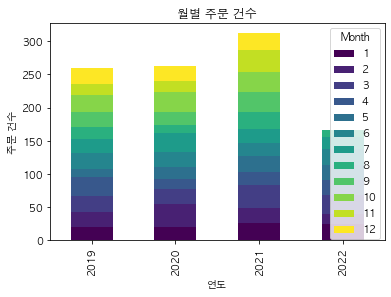

In [42]:
# 날짜 데이터를 연도와 월로 추출
coffee_df['Year'] = coffee_df['Order Date'].dt.year
coffee_df['Month'] = coffee_df['Order Date'].dt.month

# 월별 막대 그래프
monthly_counts = coffee_df.groupby(['Year', 'Month']).size().unstack()
monthly_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('월별 주문 건수')
plt.xlabel('연도')
plt.ylabel('주문 건수')
plt.show()

- 기간: 2019년 1월 ~ 2022년 8월
- 주문건수는 2021년이 가장 높은 편

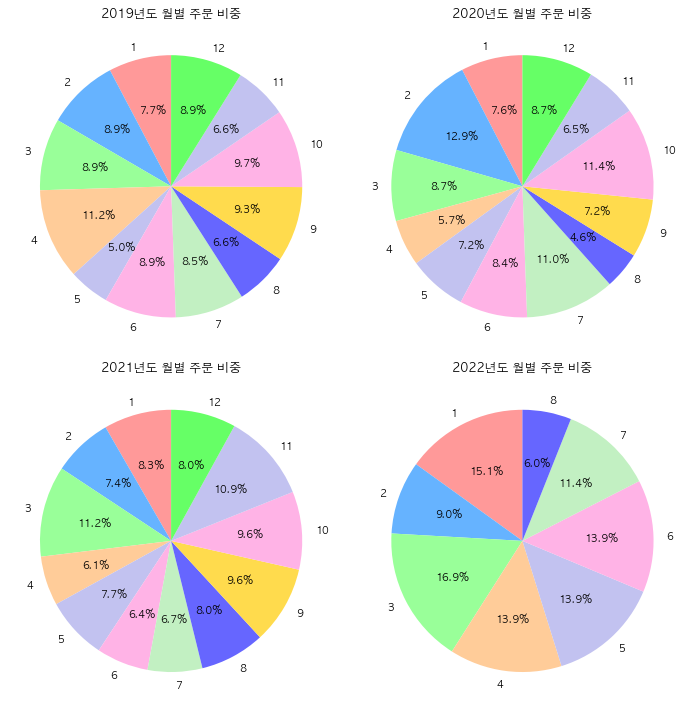

In [43]:
# 파이 차트 색 설정
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#6666ff', '#ffdb4d', '#ffb3e6', '#c2c2f0', '#66ff66']

# 년도별 월별 주문 건수 데이터를 계산
year_month_counts = coffee_df.groupby(['Year', 'Month']).size().unstack()
year_month_counts = year_month_counts.fillna(0)

# 파이 차트
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
years = year_month_counts.index

for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]
    data = year_month_counts.loc[year]
    labels = data.index
    data = data[data > 0]
    labels = labels[year_month_counts.loc[year] > 0]
    if len(data) > 0:
        ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors[:len(data)])
        ax.set_title(f'{year}년도 월별 주문 비중')

plt.tight_layout()
plt.show()

- 2019년: 4월 비중 높음
- 2020년: 2월, 7월, 10월 비중 높음
- 2021년: 3월, 11월 비중 높음
- 2022년: 3월, 1월 비중 높음

### 4-2. 나라별 비중 확인

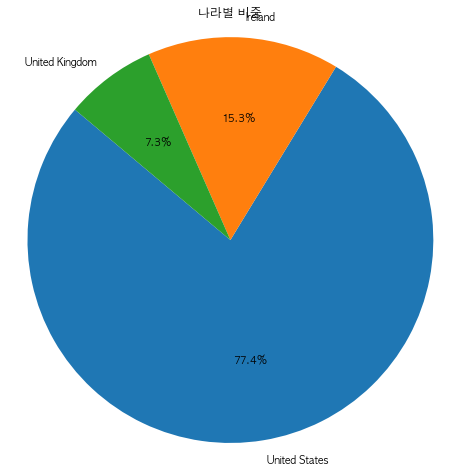

In [44]:
# 'Country' 컬럼의 고유한 값과 갯수 추출
country_counts = coffee_df['Country'].value_counts()

# 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('나라별 비중')
plt.axis('equal')

plt.show()

- 미국 77%, 아일랜드 15%, 영국 7% 비중 차지

### 4-3. 도시별 빈도 확인

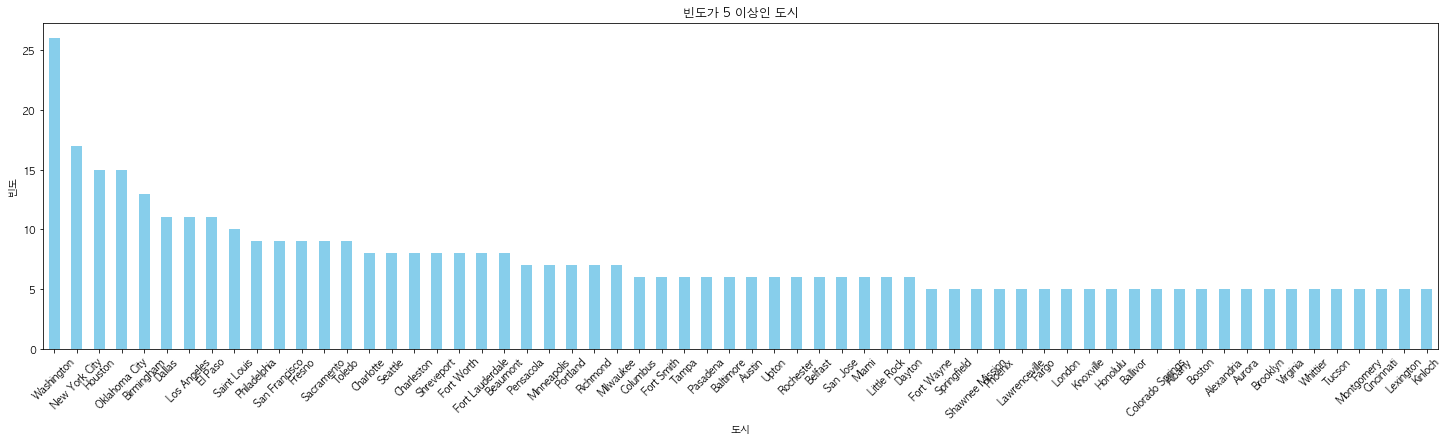

In [45]:
# 5이상인 도시별 빈도 확인
city_counts = coffee_df['City'].value_counts()
threshold = 5
top_cities = city_counts[city_counts >= threshold]

# 시각화
plt.figure(figsize=(25, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title(f'빈도가 {threshold} 이상인 도시')
plt.xlabel('도시')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()

- 가장 빈도가 높은 도시 : Washington
- 워싱턴은 높은 수요, 커피 문화 확산, 인구 밀집 지역

### 4-4. Loyalty Card 비율

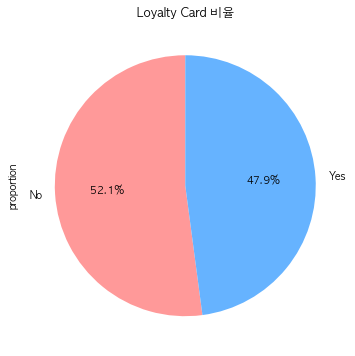

In [55]:
# Loyalty Card 비율
loyalty_card_counts = coffee_df['Loyalty Card'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff']
loyalty_card_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Loyalty Card 비율')
plt.show()

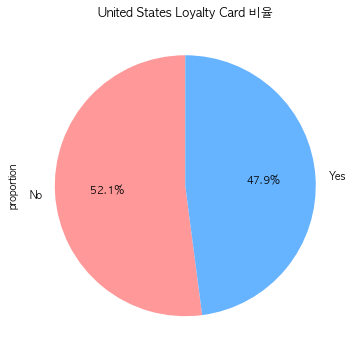

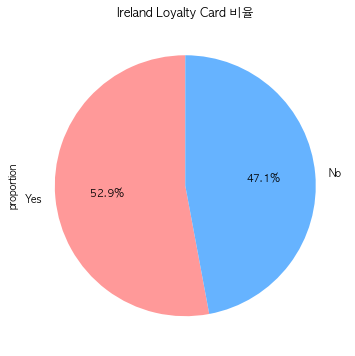

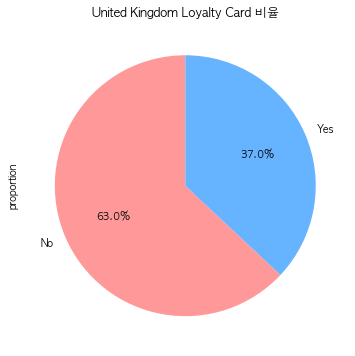

In [53]:
# 나라별 Loyalty Card 비율
countries = coffee_df['Country'].unique()

# 각 나라별 파이차트
for country in countries:
    country_data = coffee_df[coffee_df['Country'] == country]
    loyalty_card_counts = country_data['Loyalty Card'].value_counts(normalize=True)
    
    plt.figure(figsize=(6, 6))
    colors = ['#ff9999', '#66b3ff']
    loyalty_card_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{country} Loyalty Card 비율')
    plt.show()

- 대부분 나라의 절반 이상이 Loyalty Card 가지고 있지 않음
- 그 중에서도 영국의 No 비율이 가장 높은 편

### 4-5. Coffee Type 비율

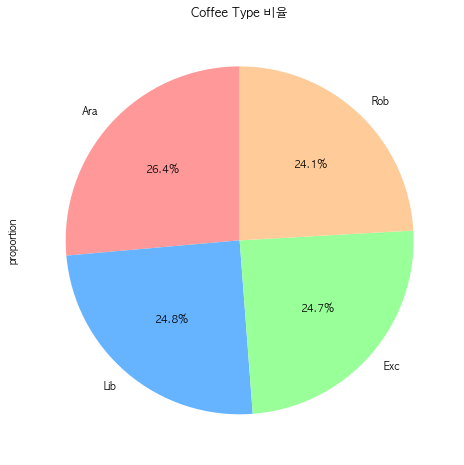

In [56]:
# "Coffee Type" 컬럼의 값 비율
coffee_type_counts = coffee_df['Coffee Type'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
coffee_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Coffee Type 비율')
plt.show()

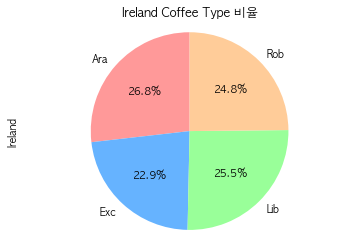

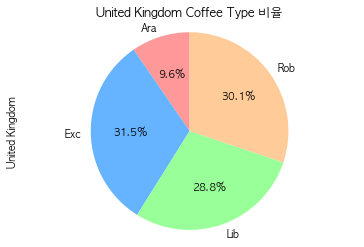

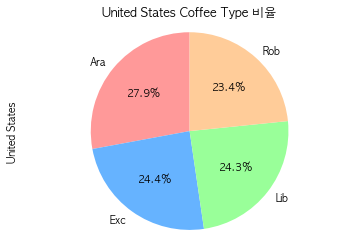

In [59]:
# 각 나라별 Coffee Type의 비율
country_coffee_type_counts = coffee_df.groupby('Country')['Coffee Type'].value_counts(normalize=True).unstack()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for country in country_coffee_type_counts.index:
    coffee_type_counts = country_coffee_type_counts.loc[country]
    coffee_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{country} Coffee Type 비율')
    plt.axis('equal')
    plt.show()

- 아일랜드와 미국은 Coffee Type 종류 비율이 비슷한 편
- 영국은 Ara는 다른 종류에 비해 비중 적음

### 4-6. Roast Type 비율

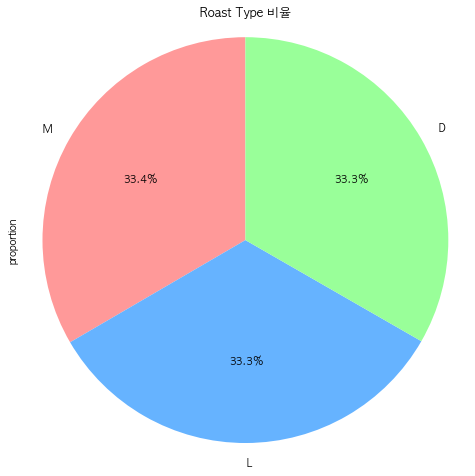

In [63]:
# Roast Type 비율 확인
roast_type_counts = coffee_df['Roast Type'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
roast_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Roast Type 비율')
plt.axis('equal') 
plt.show()

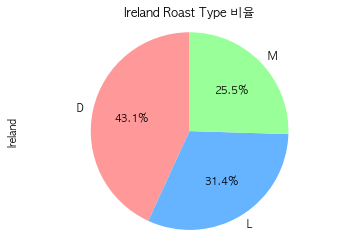

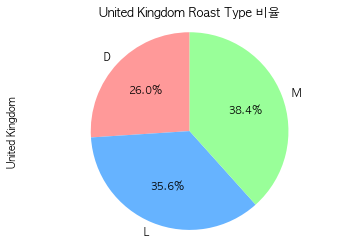

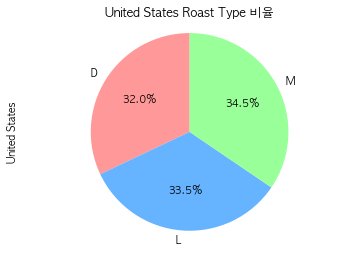

In [64]:
# 각 나라별 Roast Type의 비율 확인
country_roast_type_counts = coffee_df.groupby('Country')['Roast Type'].value_counts(normalize=True).unstack()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for country in country_roast_type_counts.index:
    roast_type_counts = country_roast_type_counts.loc[country]
    roast_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{country} Roast Type 비율')
    plt.axis('equal')
    plt.show()

- "L" (Light Roast) - 연한 로스트: 커피 콩을 상대적으로 짧은 시간 동안 낮은 온도에서 볶아내어 커피 콩의 신선한 특성과 산미를 유지하며 깔끔하고 과일 또는 꽃향기를 가지게 됩니다.
- "M" (Medium Roast) - 중간 로스트: 연한 로스트와 어두운 로스트의 중간 정도로 커피 콩을 볶는 방식입니다. 구수하면서도 깊은 맛을 제공하며, 산미와 풍미가 균형을 이루고 있습니다.
- "D" (Dark Roast) - 어두운 로스트: 커피 콩을 오랫동안 더욱 고온에서 볶아내어 커피 콩이 윤기를 잃고 부드럽고 깊은 맛을 가집니다. 새로운 풍미와 고소함을 갖추어 강렬한 풍미를 제공합니다.

- 아일랜드에서는 D 비율 높은 편 => 아일랜드인들은 진한 로스트의 커피를 선호
- 영국에서는 D 비율이 적은 편 => 영국인들은 덜 진한 로스트의 커피를 선호

### 4-7. Size 비율

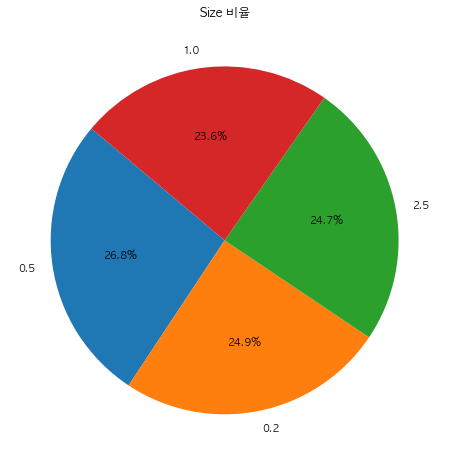

In [69]:
# Size 컬럼 비율 확인
size_counts = coffee_df['Size'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Size 비율')
plt.show()

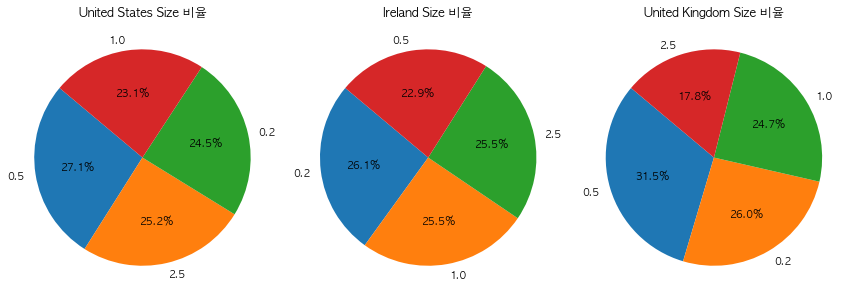

In [70]:
# 나라별 Size 비율 확인
countries = coffee_df['Country'].unique()

plt.figure(figsize=(16, 16))

for i, country in enumerate(countries, 1):
    plt.subplot(4, 4, i)
    country_df = coffee_df[coffee_df['Country'] == country]
    size_counts = country_df['Size'].value_counts()
    
    plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{country} Size 비율')

plt.tight_layout()
plt.show()

- 영국의 size 0.5 비율 높은 편 => 영국인들은 작은 사이즈 커피를 선호